## 6.3 Geographical Vizualizations in Python

### This script contains the following:

1. Importing Libraries and data
2. Data Wrangling
3. Data Cleaning
4. Plotting a Choropleth
5. Exporting Data Frame in Pkl

## 1. Importing Libararies and Data

In [2276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import folium 
import json
import plotly.express as px
from matplotlib.widgets import Button
from branca.element import Template, MacroElement

In [2277]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [2278]:
# Import ".json" file for Tokyo 
tokyo_ward = r'/Users/rose/Documents/My Tableau Repository/Advance Analytics & Dashboard Design/02 Data/Misc/tokyo23.json'

In [2279]:
# Check data type for tokyo_ward. 
type(tokyo_ward)

str

In [2280]:
# Check path for tokyo_ward. Saved a copy under '03 Scripts' to convert it into a dictionary to prepare it for matching with data to plot. Note: I was getting an error prior to saving one under Scripts folder.
os.getcwd()

'/Users/rose/Documents/My Tableau Repository/Advance Analytics & Dashboard Design/03 Scripts'

In [2281]:
# Convert JSON string to dictionary; Load the JSON file containing GeoJSON data for Tokyo wards

with open('tokyo23.json', 'r', encoding='utf-8') as f:
    tokyo_ward = json.load(f)

In [2282]:
# Check to see if converstion is successful
type(tokyo_ward)

dict

In [2283]:
path = r'/Users/rose/Documents/My Tableau Repository/Advance Analytics & Dashboard Design'

In [2284]:
# Import data
df_listings_explored = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'listings_explored.pkl'))

In [2285]:
df_listings_explored.shape

(12197, 20)

In [2286]:
df_listings_explored.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12197 entries, 0 to 13724
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      12197 non-null  object 
 1   host_id                 12197 non-null  object 
 2   host_response_time      12197 non-null  object 
 3   host_response_rate      12197 non-null  float64
 4   host_is_superhost       12197 non-null  int64  
 5   host_identity_verified  12197 non-null  int64  
 6   neighbourhood           12197 non-null  object 
 7   latitude                12197 non-null  float64
 8   longitude               12197 non-null  float64
 9   room_type               12197 non-null  object 
 10  accommodates            12197 non-null  int64  
 11  beds                    12197 non-null  float64
 12  minimum_nights          12197 non-null  int64  
 13  number_of_reviews       12197 non-null  int64  
 14  review_scores_rating    12197 non-null  flo

In [2287]:
df_listings_explored.head(2)

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,room_type,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd,region,pricing_score,rating_score
0,197677,964081,within a day,100.0,1,1,Sumida Ku,35.71707,139.82608,Entire home/apt,2,2.0,3,174,4.77,0,74.0,Eastern,Low Price,High Rating
1,776070,801494,within an hour,100.0,1,1,Kita Ku,35.73844,139.76917,Private room,1,1.0,3,249,4.98,0,53.0,Northern,Low Price,High Rating


## 2. Data Wrangling

In [2288]:
type(df_listings_explored)

pandas.core.frame.DataFrame

In [2289]:
# Renaming a column
df_listings_explored.rename(columns = {'neighbourhood' : 'ward'}, inplace = True)
# Verify change
df_listings_explored.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,ward,latitude,longitude,room_type,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd,region,pricing_score,rating_score
0,197677,964081,within a day,100.0,1,1,Sumida Ku,35.717070,139.826080,Entire home/apt,2,2.0,3,174,4.77,0,74.0,Eastern,Low Price,High Rating
1,776070,801494,within an hour,100.0,1,1,Kita Ku,35.738440,139.769170,Private room,1,1.0,3,249,4.98,0,53.0,Northern,Low Price,High Rating
2,905944,4847803,within an hour,97.0,1,1,Shibuya Ku,35.678780,139.678470,Entire home/apt,6,4.0,3,198,4.78,1,172.0,Central,Mid Price,High Rating
4,3838856,4626879,within an hour,100.0,1,1,Shibuya Ku,35.682450,139.690090,Entire home/apt,7,5.0,1,220,4.89,0,166.0,Central,Mid Price,High Rating
5,1196177,5686404,within an hour,100.0,0,1,Adachi Ku,35.744731,139.797384,Private room,4,2.0,2,108,4.75,0,37.0,Eastern,Low Price,High Rating


## 3. Conduct consistency checks

In [2290]:
# Check for missing values
df_listings_explored.isnull().sum()

id                        0
host_id                   0
host_response_time        0
host_response_rate        0
host_is_superhost         0
host_identity_verified    0
ward                      0
latitude                  0
longitude                 0
room_type                 0
accommodates              0
beds                      0
minimum_nights            0
number_of_reviews         0
review_scores_rating      0
instant_bookable          0
price_usd                 0
region                    0
pricing_score             0
rating_score              0
dtype: int64

In [2291]:
df_listings_explored.describe().round(2)

,host_response_rate,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd
count,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00
mean,99.23,0.32,0.98,35.70,139.74,4.00,2.41,1.98,37.01,4.68,0.75,146.10
std,4.63,0.47,0.15,0.04,0.06,2.59,1.68,2.89,61.83,0.33,0.43,85.13
min,0.00,0.00,0.00,35.54,139.58,1.00,1.00,1.00,0.00,1.00,0.00,10.00
25%,100.00,0.00,1.00,35.69,139.70,2.00,1.00,1.00,4.00,4.60,0.00,83.00
50%,100.00,0.00,1.00,35.70,139.73,3.00,2.00,1.00,15.00,4.71,1.00,127.00
75%,100.00,1.00,1.00,35.72,139.79,5.00,3.00,2.00,46.00,4.88,1.00,191.00
max,100.00,1.00,1.00,35.81,139.91,16.00,20.00,29.00,2258.00,5.00,1.00,410.00


In [2292]:
df_listings_explored.shape

(12197, 20)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_usd', ylabel='Count'>

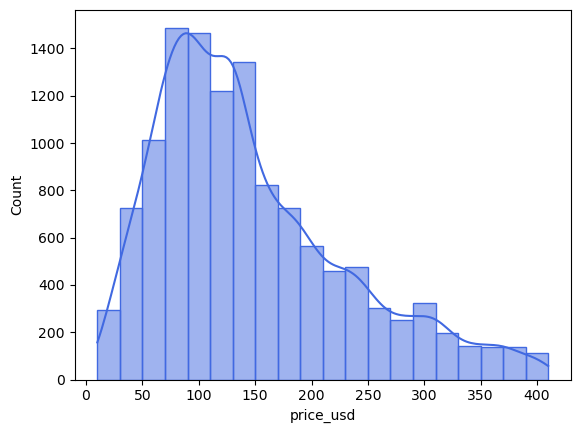

In [2293]:
# shows extreme values for 'price_usd'
sns.histplot(df_listings_explored['price_usd'], bins=20, kde=True, color='royalblue', edgecolor='royalblue')


## 4. Plotting a Choropleth

In [2294]:
# Create a data frame with just the ward and price variables

data_to_plot = df_listings_explored[['ward','price_usd']]
data_to_plot.head()

,ward,price_usd
0,Sumida Ku,74.0
1,Kita Ku,53.0
2,Shibuya Ku,172.0
4,Shibuya Ku,166.0
5,Adachi Ku,37.0


In [2295]:
type(data_to_plot)

pandas.core.frame.DataFrame

In [2296]:
# Sort to check for outliers and their location, use head()
data_to_plot_sorted = data_to_plot.sort_values(by='price_usd', ascending=False)
data_to_plot_sorted.head()

,ward,price_usd
597,Shinjuku Ku,410.0
3855,Minato Ku,410.0
4049,Minato Ku,410.0
12280,Setagaya Ku,410.0
4040,Minato Ku,410.0


In [2297]:
# Seventy-five percent of property listings are price $196 and under, with minimum rate at $10 and maximum rate at $423
data_to_plot_sorted.describe().round(2)

,price_usd
count,12197.00
mean,146.10
std,85.13
min,10.00
25%,83.00
50%,127.00
75%,191.00
max,410.00


In [2298]:
data_to_plot_sorted.shape

(12197, 2)

In [2299]:
# Check geo data's data type
type(tokyo_ward)

dict

In [2300]:
# Print geo data
print(tokyo_ward)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'N03_001': '東京都', 'N03_002': '', 'N03_003': '', 'N03_004': 'Taito Ku', 'N03_007': '13106'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[139.76666667, 35.71329536], [139.76609447, 35.7134638], [139.76603752000003, 35.71348047], [139.76568197000003, 35.7135852], [139.76561725000002, 35.71406964], [139.76597034000002, 35.71454075], [139.76597866, 35.71459853], [139.76603117000002, 35.7149688], [139.76605589000002, 35.71514269], [139.76601311000002, 35.71543075], [139.76565978000002, 35.71604325], [139.76548839, 35.71649687], [139.76531494000002, 35.71666659], [139.76531486000002, 35.71666667], [139.76511394, 35.71686325], [139.76479477, 35.7169202], [139.76471311000003, 35.71693464], [139.76451978, 35.7171338], [139.76451562000003, 35.71719241], [139.76450949, 35.7172752], [139.7649045, 35.71752769], [139.76502895000002, 35.71760741], [139.76592747, 35.71666667], [139.76592756, 35.71666659], [139.765

In [2301]:
# Create a choropleth map centered/zomed on Tokyo
m = folium.Map(location=[35.6895, 139.6917], tiles="cartodbpositron", zoom_start=12)

# Define a color function 
def my_color_function(feature):
    # Assigning colors based on price levels
    price = feature['ward']['price_usd']
    if price < 150:
        return 'yellow'
    elif 200 <= price < 150:
        return 'green'
    else:
        return 'red'


# Create a choropleth layer
folium.Choropleth(
    geo_data=tokyo_ward,
    data=data_to_plot, # data_to_plot is a subset dataframe used for this 1st choropleth
    columns=['ward', 'price_usd'],
    key_on='feature.properties.N03_004',  # N03_004 column contain's the ward name to be used as the key
    fill_color='YlGn',  # Color scale for the choropleth map
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='Average Price in US dollars',  
    highlight=True,  # Enables highlighting over hovered regions
    nan_fill_color='blue',  # select color for NaN values (if any)
    nan_fill_opacity=0.4,  # Opacity for NaN values
    reset=True,  # Reset the map when clicked
    bins=[0, 100, 200, 300, 400, 500]
).add_to(m)

# Save the map as an HTML file
m.save('map2.html')


#### Attempt to create a 2nd choropleth map with a second check for outliers

In [2302]:
#create a function to find outliers using IQR

def find_outliers_IQR(data_to_plot):
   q1=data_to_plot.quantile(0.25)
   q3=data_to_plot.quantile(0.75)
   IQR=q3-q1
   outliers = data_to_plot[((data_to_plot<(q1-1.5*IQR)) | (data_to_plot>(q3+1.5*IQR)))]

   return outliers

In [2303]:
# Print number of outliers, with the max and min outlier values
outliers = find_outliers_IQR(data_to_plot['price_usd'])

print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

outliers

number of outliers: 350
max outlier value: 410.0
min outlier value: 354.0


15       380.0
178      360.0
193      398.0
196      389.0
295      373.0
         ...  
13651    389.0
13687    360.0
13699    371.0
13705    386.0
13716    396.0
Name: price_usd, Length: 350, dtype: float64

In [2304]:
# Use quartiles (IQR method) to define the range

Q1 = data_to_plot['price_usd'].quantile(0.25)
Q3 = data_to_plot['price_usd'].quantile(0.75)
IQR = Q3 - Q1

In [2305]:
# Define the lower and upper bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [2306]:
# Filter the DataFrame to remove outliers
df_filtered = data_to_plot[(data_to_plot['price_usd'] >= lower_bound) & (data_to_plot['price_usd'] <= upper_bound)]

#### df_filtered is subset df to be used to create 2nd choropleth. 

In [2307]:
print(df_filtered['price_usd'].describe().round(2))

count    11847.00
mean       139.17
std         76.04
min         10.00
25%         82.00
50%        124.00
75%        185.00
max        353.00
Name: price_usd, dtype: float64


In [2308]:
type(df_filtered)

pandas.core.frame.DataFrame

In [2309]:
df_filtered.head()

,ward,price_usd
0,Sumida Ku,74.0
1,Kita Ku,53.0
2,Shibuya Ku,172.0
4,Shibuya Ku,166.0
5,Adachi Ku,37.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


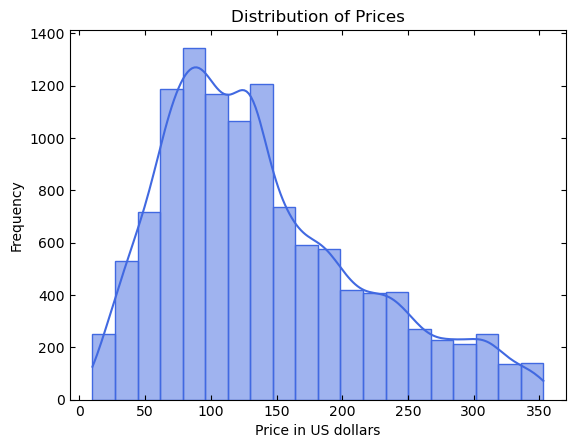

In [2310]:
# Set the style of tick labels to plain
plt.ticklabel_format(style='plain')

# Create a histogram with seaborn
sns.histplot(df_filtered['price_usd'], bins=20, kde=True, color='royalblue', edgecolor='royalblue')

# Add labels and title
plt.xlabel('Price in US dollars')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')

# Optionally, adjust tick parameters if needed
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True)


# Show the plot
plt.show()

#### With outliers filtered out, the distribution appears slightly right-skewed, but fairly symmetric in comparison to the original data frame. Prices within the 50 to 150 tick marks are the most popular.

In [2311]:
# Create the 2nd map, with outliers removed, for the filtered data frame centered on Tokyo
m_filtered = folium.Map(location=[35.6895, 139.6917], tiles="cartodbpositron", zoom_start=12)

# Define a color function assigning color based on the feature's properties
def my_color_function(feature):
    # Assigning colors based on price levels
    price = feature['ward']['price_usd']
    if price < 150:
        return 'blue'
    elif 200 <= price < 150:
        return 'yellow'
    else:
        return 'red'

# Create a choropleth layer
folium.Choropleth(
    geo_data=tokyo_ward,
    data=df_filtered, # df_filtered is dataframe used for the 2nd choropleth
    columns=['ward', 'price_usd'],
    key_on='feature.properties.N03_004',  # Use N03_004 (ward name) as the key
    fill_color='YlGn',  # Color scale for the choropleth map
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='Average Price',  # Legend title
    highlight=True,  # Enables highlighting on hovered regions
    nan_fill_color='blue',  
    nan_fill_opacity=0.4,  
    reset=True,  # Reset the map when clicked
    bins=[0, 100, 200, 300, 400, 500]    
).add_to(m_filtered)


# Save the map as an HTML file
m_filtered.save('map2_filtered.html')

#### Use a custom function to create a new column 

In [2312]:
# Define a custom function
def price_label(row):
    if row['price_usd'] <= 100:
        return 'Low'
    elif (row['price_usd'] > 100) and (row['price_usd'] <= 300):
        return 'Medium'
    elif (row['price_usd'] > 300) and (row['price_usd'] <= 400):
        return 'High'
    elif row['price_usd'] > 400:
        return 'Very High'
    else: return 'Not enough data'

#### Apply the custom function on df_filtered using loc

In [2313]:
# For the subset defined above, df: Create a new column, price_range
df_filtered.loc[:, 'price_range'] = df_filtered.apply(price_label, axis=1)

/var/folders/3d/n4rd9d4920lcv99lmvhn9ghr0000gp/T/ipykernel_47481/3565332420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'price_range'] = df_filtered.apply(price_label, axis=1)


In [2314]:
# Check output
df_filtered.head()

,ward,price_usd,price_range
0,Sumida Ku,74.0,Low
1,Kita Ku,53.0,Low
2,Shibuya Ku,172.0,Medium
4,Shibuya Ku,166.0,Medium
5,Adachi Ku,37.0,Low


In [2315]:
# Frequency
df_filtered['price_range'].value_counts(dropna = False)

price_range
Medium    6920
Low       4397
High       530
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Prices')

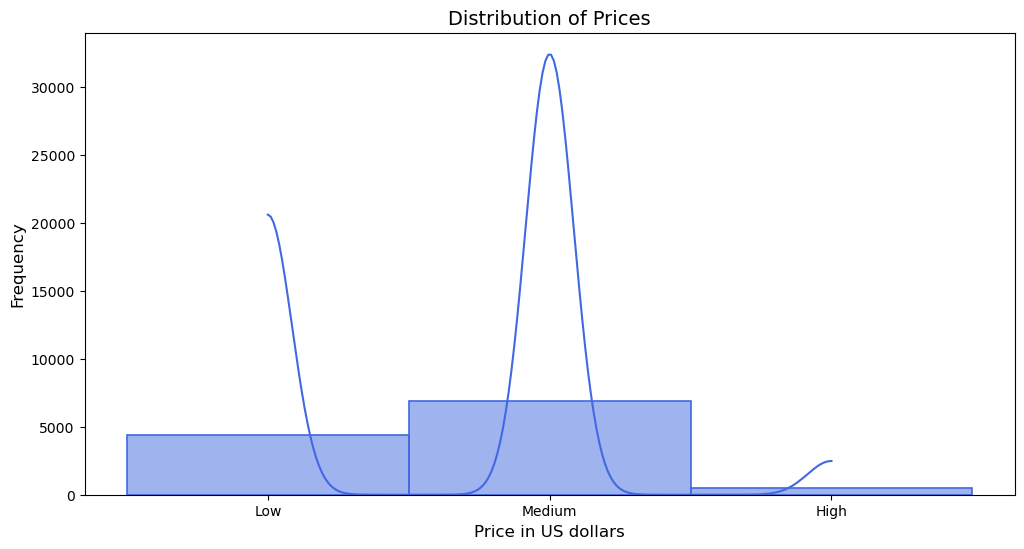

In [2316]:
# Set the size of the figure (width, height) in inches
plt.figure(figsize=(12, 6))  # Adjust width and height as needed

# Create a histogram with seaborn
sns.histplot(df_filtered['price_range'], bins=5, kde=True, color='royalblue', 
             edgecolor='royalblue', linewidth=1.2)

# Add labels and title with adjusted font sizes
plt.xlabel('Price in US dollars', fontsize=12)  # Adjust font size as needed
plt.ylabel('Frequency', fontsize=12)  # Adjust font size as needed
plt.title('Distribution of Prices', fontsize=14)  # Adjust font size as needed

#### df_filtered passed through a second outlier check (the first was in 6.1 --data cleaning section)

In [2317]:
df_filtered.describe().round(2)

,price_usd
count,11847.00
mean,139.17
std,76.04
min,10.00
25%,82.00
50%,124.00
75%,185.00
max,353.00


#### df_listings_explored price_usd max of 423 is a result of first pass for outlier check --see data cleaning section, 6.1 notebook

In [2318]:
df_listings_explored.describe().round(2)

,host_response_rate,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd
count,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00,12197.00
mean,99.23,0.32,0.98,35.70,139.74,4.00,2.41,1.98,37.01,4.68,0.75,146.10
std,4.63,0.47,0.15,0.04,0.06,2.59,1.68,2.89,61.83,0.33,0.43,85.13
min,0.00,0.00,0.00,35.54,139.58,1.00,1.00,1.00,0.00,1.00,0.00,10.00
25%,100.00,0.00,1.00,35.69,139.70,2.00,1.00,1.00,4.00,4.60,0.00,83.00
50%,100.00,0.00,1.00,35.70,139.73,3.00,2.00,1.00,15.00,4.71,1.00,127.00
75%,100.00,1.00,1.00,35.72,139.79,5.00,3.00,2.00,46.00,4.88,1.00,191.00
max,100.00,1.00,1.00,35.81,139.91,16.00,20.00,29.00,2258.00,5.00,1.00,410.00


 #### Choropleth Interpretation

I created two choropleths for this project: "map2" and "map2_filtered". The "map2" displays the distribution of listing prices across the 23 wards in Tokyo as applied on the dataframe df_listings_explored. However, the presence of outliers skewed the perception of the distribution, suggesting a strong preference for Toshima, Shinjuku, and Sumida wards. After filtering out the outliers, a more accurate picture emerged, revealing Shinjuku as the most preferred ward in all of Tokyo, prompting the question on whether distance to Tokyo's major transportation hub, the Shinjuku Station, has positive relationship with price. 

#### Create a subset data frame, data_for_plotting, containing the following columns: 'ward', 'latitude', 'longitude' to create a scatterplot of listings given their coordinates 


In [2319]:
data_for_plotting = df_listings_explored[['ward','latitude', 'longitude', 'region']]
data_for_plotting.head().round(2)

,ward,latitude,longitude,region
0,Sumida Ku,35.72,139.83,Eastern
1,Kita Ku,35.74,139.77,Northern
2,Shibuya Ku,35.68,139.68,Central
4,Shibuya Ku,35.68,139.69,Central
5,Adachi Ku,35.74,139.80,Eastern


In [2320]:
data_for_plotting.head()

,ward,latitude,longitude,region
0,Sumida Ku,35.717070,139.826080,Eastern
1,Kita Ku,35.738440,139.769170,Northern
2,Shibuya Ku,35.678780,139.678470,Central
4,Shibuya Ku,35.682450,139.690090,Central
5,Adachi Ku,35.744731,139.797384,Eastern


In [2321]:
# Define color palette for regions --shades of green
color_palette = {
    'Central': '#005100',  
    'Northern': '#00b300', 
    'Western': '#8de971',  
    'Southern': '#c1fec1', 
    'Eastern': '#008200',  
}

/var/folders/3d/n4rd9d4920lcv99lmvhn9ghr0000gp/T/ipykernel_47481/2052496793.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


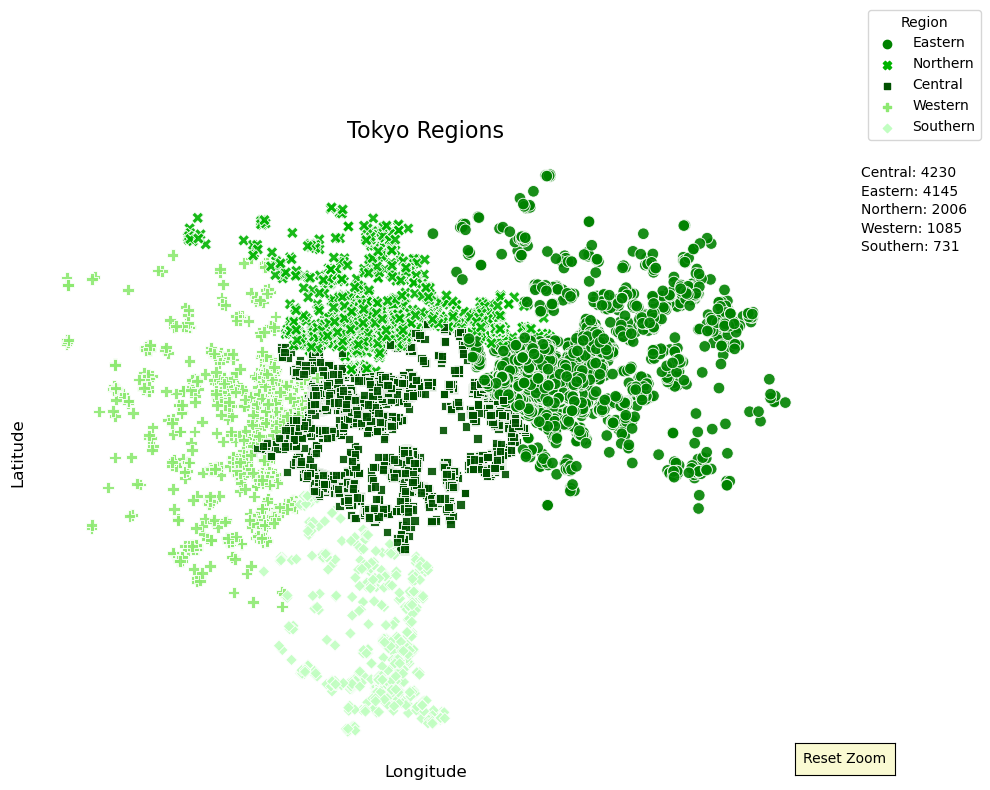

<Figure size 640x480 with 0 Axes>

In [2322]:
# Create the scatterplot

fig, ax = plt.subplots(figsize=(10, 8))

# Set the background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Create the scatter plot
scatter = sns.scatterplot(
    data=data_for_plotting,
    x='longitude',
    y='latitude',
    hue='region',
    palette=color_palette,
    style='region',
    alpha=0.9,
    s=70,
    ax=ax
)

# Customize the plot
plt.title('Tokyo Regions', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Remove all spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

# Adjust legend
ax.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='lower left')

# Add text showing the count of each region
for i, (region, count) in enumerate(data_for_plotting['region'].value_counts().items()):
    ax.text(1.05, 0.95 - i*0.03, f"{region}: {count}", transform=ax.transAxes)

# Store the original view limits
original_xlim = ax.get_xlim()
original_ylim = ax.get_ylim()

# Function to reset the view
def reset(event):
    ax.set_xlim(original_xlim)
    ax.set_ylim(original_ylim)
    plt.draw()

# Add a reset button
reset_ax = plt.axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_ax, 'Reset Zoom', color='lightgoldenrodyellow', hovercolor='0.975')
reset_button.on_clicked(reset)

# Enable zooming
plt.gcf().canvas.mpl_connect('scroll_event', lambda event: plt.gca().set_xlim(ax.get_xlim()))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Save the plot as PNG
plt.savefig('tokyo_regions_scatterplot.png', dpi=300, bbox_inches='tight')

In [2323]:
df_listings_explored.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,ward,latitude,longitude,room_type,accommodates,beds,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,price_usd,region,pricing_score,rating_score
0,197677,964081,within a day,100.0,1,1,Sumida Ku,35.717070,139.826080,Entire home/apt,2,2.0,3,174,4.77,0,74.0,Eastern,Low Price,High Rating
1,776070,801494,within an hour,100.0,1,1,Kita Ku,35.738440,139.769170,Private room,1,1.0,3,249,4.98,0,53.0,Northern,Low Price,High Rating
2,905944,4847803,within an hour,97.0,1,1,Shibuya Ku,35.678780,139.678470,Entire home/apt,6,4.0,3,198,4.78,1,172.0,Central,Mid Price,High Rating
4,3838856,4626879,within an hour,100.0,1,1,Shibuya Ku,35.682450,139.690090,Entire home/apt,7,5.0,1,220,4.89,0,166.0,Central,Mid Price,High Rating
5,1196177,5686404,within an hour,100.0,0,1,Adachi Ku,35.744731,139.797384,Private room,4,2.0,2,108,4.75,0,37.0,Eastern,Low Price,High Rating


In [2324]:
df_listings_explored.shape

(12197, 20)

In [2325]:
df_filtered.head()

,ward,price_usd,price_range
0,Sumida Ku,74.0,Low
1,Kita Ku,53.0,Low
2,Shibuya Ku,172.0,Medium
4,Shibuya Ku,166.0,Medium
5,Adachi Ku,37.0,Low


In [2326]:
# Frequency for 'room_type'
df_listings_explored['room_type'].value_counts(dropna = False)

room_type
Entire home/apt    9133
Private room       2538
Shared room         374
Hotel room          152
Name: count, dtype: int64

In [2327]:
# Frequency for 'ward'
df_listings_explored['ward'].value_counts(dropna = False)

ward
Shinjuku Ku      2302
Taito Ku         1654
Sumida Ku        1541
Toshima Ku       1159
Shibuya Ku        784
Ota Ku            488
Minato Ku         473
Setagaya Ku       398
Nakano Ku         362
Kita Ku           358
Katsushika Ku     321
Chuo Ku           272
Suginami Ku       250
Koto Ku           249
Arakawa Ku        247
Bunkyo Ku         245
Itabashi Ku       242
Edogawa Ku        241
Shinagawa Ku      172
Chiyoda Ku        154
Adachi Ku         139
Nerima Ku          75
Meguro Ku          71
Name: count, dtype: int64

In [2328]:
df_filtered['price_usd'].describe().round(2)

count    11847.00
mean       139.17
std         76.04
min         10.00
25%         82.00
50%        124.00
75%        185.00
max        353.00
Name: price_usd, dtype: float64

In [2329]:
df_listings_explored.shape

(12197, 20)

In [2330]:
df_filtered.shape

(11847, 3)

#### df_filtered is the filtered subset of df_listings_explored used for choropleth map

### 5. Exporting Data Frame in Pkl

In [2331]:
# Export df_listings_explored as “listings_visualized.pkl” under “Prepared Data” folder.
df_listings_explored.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'listings_visualized.pkl'))

In [2332]:
# Export geo-related data frame, df_filtered, as “filtered_visualized.pkl” under “Prepared Data” folder.
df_filtered.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'filtered_visualized.pkl'))

## 6. Export Data fram as csv

In [2333]:
# Export df_listings_explored as “listings_visualized.pkl” under “Prepared Data” folder.
df_listings_explored.to_csv(os.path.join(path, '02 Data','Prepared Data', 'listings_visualized.csv'))

In [2334]:
# Export geo-related data frame, df_filtered, as “filtered_visualized.pkl” under “Prepared Data” folder.
df_filtered.to_csv(os.path.join(path, '02 Data','Prepared Data', 'filtered_visualized.csv'))